In [369]:
import pandas as pd

In [46]:
df = pd.read_csv('russian_retail.csv')

In [47]:
df['presence_russia'] = df.presence_russia.str.findall('\d+').str[0]

In [48]:
df = df[df.domain.isin(df.domain.value_counts()[:10].index)]

In [49]:
df = df[['founded', 'presence_russia', 'description', 'total_rented_area', 'plans', 'domain']]

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1716 entries, 0 to 2736
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   founded            1582 non-null   float64
 1   presence_russia    1692 non-null   object 
 2   description        1715 non-null   object 
 3   total_rented_area  71 non-null     float64
 4   plans              484 non-null    float64
 5   domain             1716 non-null   object 
dtypes: float64(3), object(3)
memory usage: 93.8+ KB


In [53]:
df.domain.value_counts()

Одежда                       387
Кафе, ресторан               343
Продукты питания             274
Товары и услуги для детей    128
Все для дома                 106
Обувь                        102
Красота                      101
Мебель                        97
Спорт                         90
Ремонт и строительство        88
Name: domain, dtype: int64

In [54]:
df

,founded,presence_russia,description,total_rented_area,plans,domain
0,1967.0,80,Популярный бренд женской обуви и аксессуаров T...,NaN,NaN,Обувь
1,2008.0,4,"На протяжении 8 лет компания ""100 Столов"" зани...",NaN,NaN,Мебель
3,NaN,22,«1000 и одна туфелька» - сеть специализированн...,NaN,NaN,Товары и услуги для детей
4,2008.0,14,«1001 Платье» — российский производитель женск...,NaN,2.0,Одежда
7,2014.0,19,12Storeez — это российская марка женской одежд...,NaN,15.0,Одежда
...,...,...,...,...,...,...
2731,NaN,4,Рестораны нашей сети - по праву считаются одни...,NaN,1.0,"Кафе, ресторан"
2732,2011.0,10,"«Яркий» – сеть магазинов, в которых Вы можете ...",NaN,3.0,Товары и услуги для детей
2734,2008.0,31,ЯРМАРКА МЕБЕЛИ - федеральная сеть мебельных ги...,50000.0,NaN,Мебель
2735,2012.0,400,"«Ярче!» - супермаркеты шаговой доступности, гд...",NaN,30.0,Продукты питания


# Vectorization

### BagOfWords

vocabulary = ['I', 'like', 'dogs', 'cats', 'and']

text = ['I like dogs and cats', 'I like dogs', 'I like like dogs cats cats']

Токенизация - разбиение по словам

words = [['I', 'like', 'dogs', 'and', 'cats'], ...]

vectors = [[1, 1, 1, 1, 1], [1, 1, 1, 0, 0], [1, 2, 1, 2, 0]]

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

In [95]:
vectorizer = CountVectorizer()

In [118]:
texts = ['I like dogs and and and cats cats', 'I like and  dogs', 'I like like dogs and cats cats']

In [112]:
vectorizer.fit(texts)

CountVectorizer()

In [113]:
vectorizer.transform(texts).toarray()

array([[3, 2, 1, 1],
       [0, 0, 1, 1],
       [0, 2, 1, 2]])

### Tf-Idf Vectorizer

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [119]:
vectorizer = TfidfVectorizer()

In [120]:
vectorizer.fit(texts)

TfidfVectorizer()

In [121]:
vectorizer.transform(texts).toarray()

array([[0.7144376 , 0.61331233, 0.23814587, 0.23814587],
       [0.57735027, 0.        , 0.57735027, 0.57735027],
       [0.28135545, 0.72459275, 0.28135545, 0.56271091]])

### Word2Vec

In [126]:
from gensim.models.word2vec import Word2Vec
from gensim import corpora

In [128]:
words = []

for text in texts:
    words.append(text.split())

In [156]:
word2vec_vectorizer = Word2Vec(vector_size=10, window=5, min_count=1, workers=4)
word2vec_vectorizer.build_vocab(words)
word2vec_vectorizer.train(words, total_examples=len(words), epochs=1)

(0, 19)

In [177]:
def text2vec(text):
    vector = [0 for i in range(10)]
    words_count = 0
    
    for word in text:
        if not word in word2vec_vectorizer.wv:
            continue
            
        vector += word2vec_vectorizer.wv[word]
        words_count += 1
    
    if words_count == 0:
        return vector
    
    return vector / words_count

## Вернемся к задаче
Векторизация описаний компаний

In [ ]:
'Популярный бренд женской обуви и аксессуаров Tamaris основан в 1967 г.'
'Популярный бренд женской обуви и аксессуаров Tamaris основан в 1967 г'

In [183]:
import re

In [184]:
text = df.description.iloc[0]

In [ ]:
'\w', '\d', '\s'

In [214]:
re.sub('\d', ' ', re.sub('[^\w]', ' ', text))

'Популярный бренд женской обуви и аксессуаров Tamaris основан в      г  в г  Дельтмонд в Германии  Благодаря уникальному позиционированию бренд Tamaris знают     женщин Германии в возрасте от    до    лет  У каждой второй немецкой женщины есть  по крайней мере  одна пара обуви этой марки  Tamaris также присутствует на рынках более чем    стран мира  что делает его одним из флагманов отрасли в Европе  Любительницы обуви найдут в коллекциях Tamaris широчайший ассортимент моделей  из которого можно выбрать подходящую пару для любого случая  Экстравагантные новинки прямо с модных показов  непринужденные сникеры или актуальная классика   европейский бренд номер   остается бессменным фаворитом на подиуме городских улиц  В одноименной коллекции Tamaris и ее трех линейках  Tamaris Fashletics  Tamaris Heart   Sole и Tamaris PureRelax  современные и стильные женщины найдут оптимальное сочетание качества  дизайна и актуальных тенденций  что подарит им много приятных эмоций  Tamaris всегда находит

In [251]:
morph = pymorphy2.MorphAnalyzer()

In [215]:
clean_text = re.sub('[^А-Яа-яA-Za-z]', ' ', text)

In [218]:
clean_text = clean_text.lower()

In [232]:
import pymorphy2

In [246]:
norm_text_words = []

for word in clean_text.split():
    norm_text_words.append(morph.parse(word)[0].normal_form)

In [247]:
norm_text = " ".join(norm_text_words)

In [249]:
vectorizer.fit([norm_text])

TfidfVectorizer()

In [250]:
vectorizer.transform([norm_text]).toarray().shape

(1, 118)

In [ ]:
from functools import lru_cache

In [337]:
@lru_cache()
def word2norm(word):
    return morph.parse(word)[0].normal_form

In [641]:
stop_words = list(map(lambda x: x.strip(), open('stop_words.txt').readlines()))

In [643]:
word2normal_form = {}

def preprocess_text(text):
    if pd.isna(text):
        return ""
    
    clean_text = re.sub('\d', ' ', re.sub('[^\w]', ' ', text))
    clean_text = clean_text.lower()
    
    norm_text_words = []

    for word in clean_text.split():
        if word in stop_words:
            continue
            
        if word not in word2normal_form:
            normal_form = morph.parse(word)[0].normal_form
            word2normal_form[word] = normal_form
        else:
            normal_form = word2normal_form[word]
            
        norm_text_words.append(normal_form)
        
    norm_text = " ".join(norm_text_words)
    
    return norm_text

In [644]:
from tqdm.notebook import tqdm

In [645]:
clean_texts = []

for text in tqdm(df.description):
    clean_text = preprocess_text(text)
    clean_texts.append(clean_text)

  0%|          | 0/1716 [00:00<?, ?it/s]

In [646]:
df['clean_description'] = clean_texts

In [647]:
## Если размерность не получается понизить с помощью min_df -> используем max_features=4000
vectorization = TfidfVectorizer(min_df=10)
vectorization.fit(df['clean_description'])

TfidfVectorizer(min_df=10)

In [648]:
description_vectors = vectorization.transform(df['clean_description'])

In [649]:
df.founded.fillna(df.founded.median(), inplace=True)

#### Оффтоп как объединить фичи для модели

In [650]:
# sparse dont forget to do toarray()
description_vectors.shape

(1716, 2127)

In [651]:
df[['founded']].shape

(1716, 1)

In [652]:
import numpy as np

In [653]:
total_vectors = np.hstack((df[['founded']], description_vectors.toarray()))

## Кластеризация

### Kmeans

In [654]:
from sklearn.cluster import KMeans

In [655]:
kmeans = KMeans()
kmeans.fit(description_vectors)

KMeans()

In [656]:
import matplotlib.pyplot as plt

In [657]:
inerties = []
n_clusters = range(5, 30)

for n_cluster in tqdm(n_clusters):
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(description_vectors)
    
    inerties.append(kmeans.inertia_)

  0%|          | 0/25 [00:00<?, ?it/s]

Доделать: выбор кол-во кластеров. Нужно использовать метод локтя

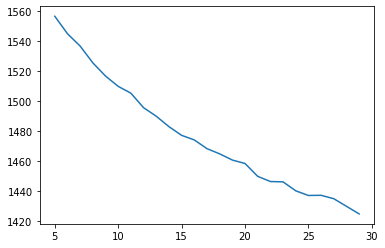

In [658]:
plt.plot(n_clusters, inerties)

Выберем размерность 26

In [659]:
description_vectors.shape

(1716, 2127)

In [660]:
kmeans.predict(description_vectors)

array([11,  5,  1, ...,  5, 15, 24], dtype=int32)

In [661]:
from sklearn.decomposition import PCA, TruncatedSVD

In [662]:
pca = TruncatedSVD()
pca.fit(description_vectors)

TruncatedSVD()

In [663]:
projected_vectors = pca.transform(description_vectors)

<AxesSubplot:>

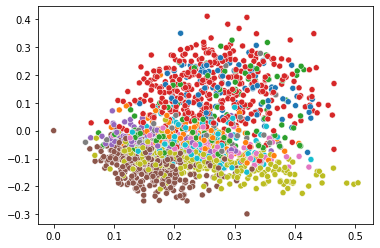

In [664]:
sns.scatterplot(
    x=projected_vectors[:, 0],
    y=projected_vectors[:, 1],
    hue=df.domain,
    legend=False
)

<AxesSubplot:>

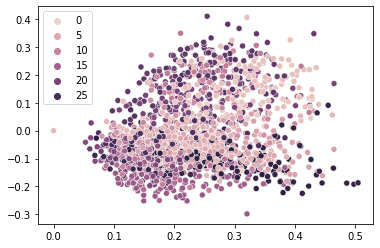

In [665]:
sns.scatterplot(
    x=projected_vectors[:, 0],
    y=projected_vectors[:, 1],
    hue=kmeans.predict(description_vectors),
)

Вот разделение похоже на разделение с целевой выборкой. Значит кластеризация работает корректно.

### Dbscan

In [666]:
from sklearn.cluster import DBSCAN

In [667]:
from sklearn.preprocessing import StandardScaler

In [668]:
description_scaler = StandardScaler()

In [669]:
description_scaler.fit(description_vectors.toarray())

StandardScaler()

In [670]:
scaled_description_vectors = description_scaler.transform(description_vectors.toarray())

In [671]:
vals = []

for eps in range(30, 50):
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(scaled_description_vectors)
    vals.append(np.unique(dbscan.labels_, return_counts=True))

<AxesSubplot:>

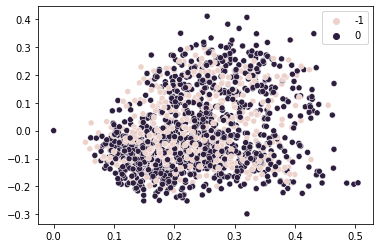

In [672]:
sns.scatterplot(
    x=projected_vectors[:, 0],
    y=projected_vectors[:, 1],
    hue=dbscan.labels_,
)

### Birch

In [673]:
from sklearn.cluster import Birch

In [674]:
birch = Birch()

In [675]:
birch.fit(description_vectors)

Birch()

<AxesSubplot:>

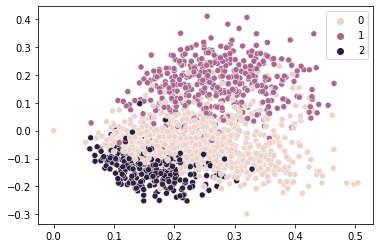

In [676]:
sns.scatterplot(
    x=projected_vectors[:, 0],
    y=projected_vectors[:, 1],
    hue=birch.labels_,
)

### Интерпретация

In [677]:
def interpret_clusterization(labels):
    value_counts = []

    for label_num in np.unique(labels):
        value_counts.append(df[labels == label_num].domain.value_counts())

    return value_counts

In [678]:
interpret_clusterization(kmeans.labels_)

[Кафе, ресторан               8
 Красота                      4
 Продукты питания             4
 Одежда                       2
 Ремонт и строительство       1
 Товары и услуги для детей    1
 Name: domain, dtype: int64,
 Обувь                        40
 Товары и услуги для детей     4
 Одежда                        3
 Name: domain, dtype: int64,
 Одежда                       82
 Товары и услуги для детей    20
 Спорт                         1
 Обувь                         1
 Name: domain, dtype: int64,
 Одежда                       34
 Продукты питания             27
 Все для дома                 16
 Кафе, ресторан               13
 Ремонт и строительство       13
 Мебель                       11
 Красота                       5
 Обувь                         4
 Товары и услуги для детей     4
 Спорт                         3
 Name: domain, dtype: int64,
 Ремонт и строительство    58
 Все для дома              23
 Красота                    5
 Мебель                     3
 Name: doma

In [679]:
interpret_clusterization(birch.labels_)

[Продукты питания             240
 Одежда                       120
 Все для дома                  99
 Красота                       97
 Мебель                        93
 Товары и услуги для детей     85
 Ремонт и строительство        84
 Спорт                         84
 Кафе, ресторан                43
 Обувь                         15
 Name: domain, dtype: int64,
 Одежда                       265
 Обувь                         86
 Товары и услуги для детей     43
 Спорт                          6
 Мебель                         4
 Ремонт и строительство         4
 Все для дома                   3
 Кафе, ресторан                 3
 Продукты питания               2
 Name: domain, dtype: int64,
 Кафе, ресторан      297
 Продукты питания     32
 Красота               4
 Все для дома          4
 Одежда                2
 Обувь                 1
 Name: domain, dtype: int64]

In [680]:
interpret_clusterization(dbscan.labels_)

[Одежда                       159
 Продукты питания             103
 Кафе, ресторан                91
 Все для дома                  46
 Товары и услуги для детей     42
 Обувь                         37
 Ремонт и строительство        37
 Красота                       29
 Мебель                        25
 Спорт                         19
 Name: domain, dtype: int64,
 Кафе, ресторан               252
 Одежда                       228
 Продукты питания             171
 Товары и услуги для детей     86
 Мебель                        72
 Красота                       72
 Спорт                         71
 Обувь                         65
 Все для дома                  60
 Ремонт и строительство        51
 Name: domain, dtype: int64]

Самые популярные топики для каждого кластера встречаются только в них и разность между второй самой популярной и первой - значима.

Kmeans - слишком много топиков, даже не смотря на метод локтя.

Dbscan - слишком мало, как бы eps не подбирали

Birch - три класса, видно что каждый топик входит в кластер почти однозначно.

## Тематическое моделирование

### LDA - Латентное распределение Дирихле

In [681]:
from gensim.models import LdaModel, LsiModel, Nmf
from gensim.corpora import Dictionary

In [682]:
# токенизация

clean_texts = []

for text in df.clean_description:
    clean_texts.append(text.split())


In [683]:
common_dictionary = Dictionary(clean_texts)
common_corpus = [common_dictionary.doc2bow(text) for text in clean_texts]

In [693]:
from gensim.models.coherencemodel import CoherenceModel

In [718]:
def fit_topic_modeling(class_topicer_name):
    num_topics = range(3, 15)
    coherences = []

    for num_topic in tqdm(num_topics):
        model = class_topicer_name(
            corpus=common_corpus,
            id2word=common_dictionary,
            num_topics=num_topic
        )
        cm = CoherenceModel(model=model, corpus=common_corpus, coherence='u_mass')
        coherences.append(cm.get_coherence())
    
    plt.title(str(class_topicer_name))
    plt.plot(num_topics, coherences)
    plt.show()
    
    return model

  0%|          | 0/12 [00:00<?, ?it/s]

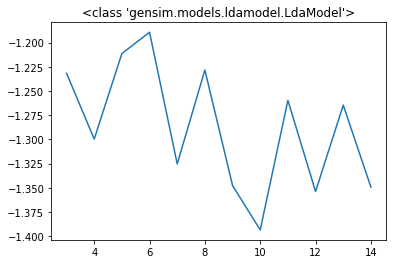

  0%|          | 0/12 [00:00<?, ?it/s]

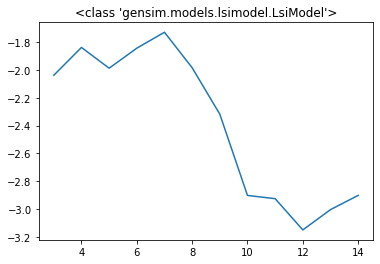

  0%|          | 0/12 [00:00<?, ?it/s]

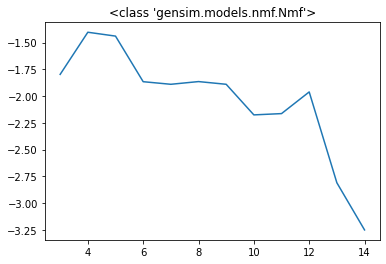

In [719]:
lda_model = fit_topic_modeling(LdaModel)
lsi_model = fit_topic_modeling(LsiModel)
nmf_model = fit_topic_modeling(Nmf)

LDA с 6 топиками имеет coherence -1.2. LSI наибольшая связнасть -1.8 при 7 топиках. Связность NMF достигает максимума -1.5 при кол-ве топиков 4. LDA с 6 топиками имеет наибольшую метрику coherence. Значит оно лучше двух остальных. 

In [721]:
model = LdaModel(
    corpus=common_corpus,
    id2word=common_dictionary,
    num_topics=6
)

In [729]:
df.domain.value_counts()

Одежда                       387
Кафе, ресторан               343
Продукты питания             274
Товары и услуги для детей    128
Все для дома                 106
Обувь                        102
Красота                      101
Мебель                        97
Спорт                         90
Ремонт и строительство        88
Name: domain, dtype: int64

In [737]:
model.show_topics(6, num_words=17)

[(0,
  '0.018*"магазин" + 0.013*"компания" + 0.010*"сеть" + 0.009*"одежда" + 0.009*"товар" + 0.009*"качество" + 0.008*"бренд" + 0.006*"покупатель" + 0.006*"наш" + 0.005*"ассортимент" + 0.005*"торговый" + 0.005*"россия" + 0.004*"продукция" + 0.004*"высокий" + 0.004*"производство" + 0.004*"цена" + 0.004*"новый"'),
 (1,
  '0.021*"компания" + 0.013*"сеть" + 0.011*"магазин" + 0.009*"наш" + 0.008*"торговый" + 0.006*"продукция" + 0.006*"товар" + 0.005*"являться" + 0.005*"производство" + 0.004*"ассортимент" + 0.004*"работать" + 0.004*"рынок" + 0.004*"россия" + 0.004*"качество" + 0.004*"обувь" + 0.004*"город" + 0.003*"бренд"'),
 (2,
  '0.009*"компания" + 0.009*"сеть" + 0.007*"бренд" + 0.007*"магазин" + 0.007*"одежда" + 0.006*"наш" + 0.005*"продукция" + 0.005*"россия" + 0.005*"качество" + 0.005*"коллекция" + 0.004*"производство" + 0.004*"российский" + 0.003*"новый" + 0.003*"москва" + 0.003*"город" + 0.003*"товар" + 0.003*"ассортимент"'),
 (3,
  '0.022*"магазин" + 0.015*"сеть" + 0.012*"компания" 

Интепретация тем:

0 - максмаркет по продаже одежды

1 - продуктовый

2 - брендованные одежды

3 - отечественное производство

4 - одежда по продажи обуви

5 - в москве одежда